In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math as m

In [3]:
Utrecht = pd.read_csv('Utrecht.csv', encoding='utf-8')
#shufflar vår data så att vi inte får en bias när vi tränar & testar (Ex det är möjligt att stora boytor är längst ner i vår lista)
Utrecht = Utrecht.sample(frac=1,random_state=20241125)
print( Utrecht )

     tomt  bo_yta  balkong    ar  pris
90  168.0  141.75        1  1967   892
29   61.7   68.85        0  1937   466
89  166.6  153.00        1  1959   857
5    97.6  144.00        0  1961   845
1   115.3  111.60        1  1927   649
..    ...     ...      ...   ...   ...
39   63.3  102.60        0  1944   631
17  104.3  106.65        1  2002   601
55  116.2  148.50        1  1992   769
3   102.1  141.75        1  1940   825
21  157.8  220.50        1  1961  1244

[100 rows x 5 columns]


In [4]:
print(Utrecht[Utrecht['balkong']==1]['pris'].describe())
print(Utrecht[Utrecht['balkong']==0]['pris'].describe())

count      81.000000
mean      801.222222
std       185.715845
min       440.000000
25%       671.000000
50%       792.000000
75%       908.000000
max      1339.000000
Name: pris, dtype: float64
count      19.000000
mean      701.736842
std       177.449787
min       466.000000
25%       534.000000
50%       706.000000
75%       790.500000
max      1070.000000
Name: pris, dtype: float64


Adj. R-squared blir sämre om vi tränar med 90 datapunkter jämfört med 80
Vidare förbättrar inte balkong prediktionen, dessutom är 0 inom balkongkoefficientens konfidensintervall

In [30]:
nbr_train_data = 100
#Enkel regression av pris
res = smf.ols(formula='pris~bo_yta+ar+tomt',data=Utrecht[:nbr_train_data])
Utrecht['res'] = res.fit().resid
model =res.fit()
Utrecht['res'] = Utrecht['pris'] - model.predict(Utrecht)
fit=res.fit()
fit.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pris   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     904.4
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           3.20e-70
Time:                        14:22:47   Log-Likelihood:                -495.92
No. Observations:                 100   AIC:                             999.8
Df Residuals:                      96   BIC:                             1010.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3264.1489    281.013     11.616      0.000    2706.343    3821.955
bo_yta         4.9645      0.116     42.791      0.000       4.734       5.195
ar            -1.6452      0.146    -11.289      0.000      -1.934      -1.356
tomt           0.6389      0.132      4.848      0.000       0.377       0.901
==============================================================================
Omnibus:                        0.139   Durbin-Watson:                   2.232
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.185
Skew:                          -0.085   Prob(JB):                        0.912
Kurtosis:                       2.877   Cond. No.                     1.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

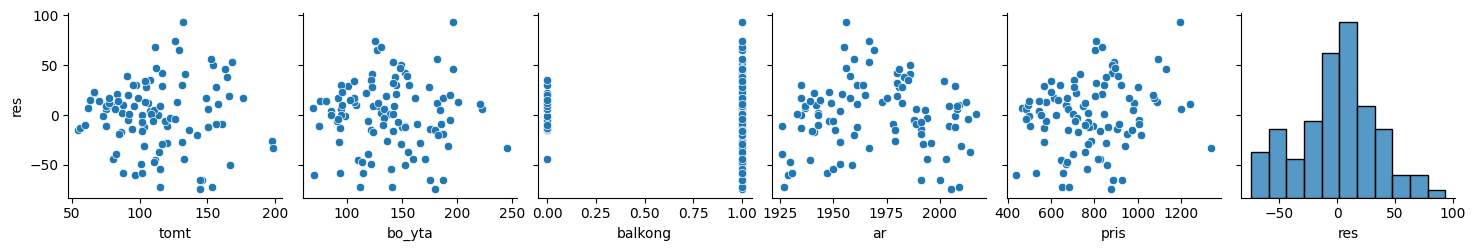

In [35]:
#Visar residualer för vår modell med testdata
sns.pairplot(Utrecht,y_vars='res')

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

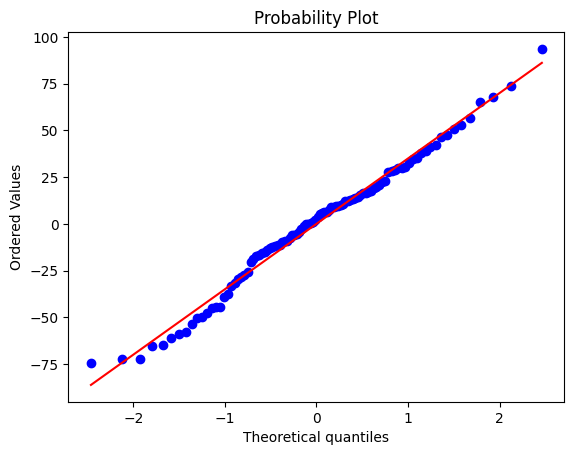

In [ ]:
#residualerna verkar väldigt normalfördelade
stats.probplot(x=Utrecht['res'],fit = True,plot=plt)

In [33]:
target = pd.DataFrame({"bo_yta": [175], "ar": [2022], "tomt": [150]})
fit.get_prediction(target).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,902.153198,8.109289,886.056386,918.25001,830.475326,973.831071


Löser 3.3 uppgift 2 genom att ge oss värdet av vår t-funktion (ta) som vårt nedåtbegränsade konfidensintervall har.

In [ ]:

X_inv = np.array(fit.cov_params())
x0 = np.array([1,175,2022,150])
print(fit.cov_params())
sigma = m.sqrt(fit.mse_resid)*m.sqrt(1+np.matmul(np.matmul(x0.T,X_inv),x0))
print(fit.predict(target))
ta = (fit.predict(target)-875)/sigma
print(ta)
#alpha = 0.5375 get oss rätt t-funktion

              Intercept    bo_yta         ar      tomt
Intercept  78968.302404  8.303615 -40.894899  3.875188
bo_yta         8.303615  0.013460  -0.004753 -0.007129
ar           -40.894899 -0.004753   0.021239 -0.002462
tomt           3.875188 -0.007129  -0.002462  0.017366
0    902.153198
dtype: float64
0    0.094443
dtype: float64
